# Simulating MIMIC Patient
We used Pulse to simulate patients in MIMIC, initializing them using their readings in MIMIC, and administering IV fluids and vasopressors at each time step as done in MIMIC. (See [MIMICSimulator.py](https://gitlab.kitware.com/faaizT/engine/-/blob/local-changes/src/python/pulse/rlengine/SimulationEngine.py) for more details about the simulations.)  
This note compares a patient in MIMIC with their simulated counterpart. The simulated patients have had their blood chemistry modified.

In [1]:
import pandas as pd
icustayid = 80943.0
export_dir = "/data/localhost/taufiq/export-dir/"
mimic_csv = "/data/localhost/taufiq/Pulse/engine/src/python/pulse/rlengine/resources/MIMICtable-1hourly_entire-stay.csv"

In [2]:
simulation = pd.read_csv(export_dir + "simulation_" + str(icustayid) + "_final_1613462702.csv")
simulation = simulation.replace(r"[\[|\]]", "", regex=True)

In [3]:
simulation.head()

,ArterialPressure (mmHg),BloodVolume (mL),Carina - CarbonDioxide - PartialPressure (mmHg),CoreTemperature (degC),DiastolicArterialPressure (mmHg),EndTidalCarbonDioxidePressure (mmHg),HeartRate (1/min),Lead3ElectricPotential (mV),MeanArterialPressure (mmHg),OxygenSaturation (None),RespirationRate (1/min),SimulationTime(s),SystolicArterialPressure (mmHg),time
0,112.36323268715603,5458.842365828579,0.31984931512988174,37.010964882205315,60.40670065951788,34.42346562939583,78.9473684210526,0.20899999999999985,90.95833560137486,0.975255460599332,15.625000000000016,0.0,118.72043195125875,7.325144e+09
1,75.69341015875601,5836.243585043136,35.2144552060969,37.25729261649781,56.77325836940786,34.5951358142069,71.42857142857139,0.0,91.61616636896944,0.9753360689570689,16.12903225806454,10800.000000142898,123.49719104948053,7.325155e+09
2,120.911241387994,5943.536676139014,0.35839660792955014,37.261742082223066,54.53584080772104,34.63399649675151,68.18181818181814,0.20899999999999985,90.63478467317441,0.9753031074695705,16.12903225806454,14400.000000221478,124.06163228547413,7.325158e+09
3,78.98291046025915,6488.232401357246,34.952983285796556,37.25004587764556,69.50301528275959,34.50993173986912,83.3333333333333,0.0,102.52383558437391,0.9751005923557214,16.12903225806454,18000.000000300057,133.0133558637132,7.325162e+09
4,119.22536306735064,7003.090707265317,0.4490026265269135,37.24167838289338,63.67810883198123,34.52498219620843,73.17073170731703,0.06300000000000017,103.2302039139974,0.9754222202127467,16.129032258064544,21600.000000378637,139.72816399345996,7.325165e+09


In [4]:
len(simulation)

31

In [5]:
MIMICtable = pd.read_csv(mimic_csv)
MIMICtable.head()


,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
0,1.0,1006.0,4.330306e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,8166.0,4083.0,-8166.0,1.0
1,11.0,1006.0,4.330342e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,12249.0,4083.0,-12249.0,1.0
2,21.0,1006.0,4.330378e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.831461,240.000000,0.0,0.0,0.0,0.0,16332.0,4083.0,-16332.0,1.0
3,22.0,1006.0,4.330382e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.955357,96.000000,0.0,0.0,0.0,0.0,20415.0,4083.0,-20415.0,1.0
4,23.0,1006.0,4.330385e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.812749,109.714286,0.0,0.0,175.0,175.0,24298.0,3883.0,-24123.0,1.0


In [6]:
MIMICtable_filtered = MIMICtable[MIMICtable['icustay_id']==icustayid]
len(MIMICtable_filtered)

31

In [7]:
MIMICtable_filtered.head()

,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
1793,1.0,80943.0,7.325144e+09,0.0,23942.819687,6.0,1.0,0.0,0.0,0.0,...,0.640340,225.714286,0.00,0.00,1000.000000,0.000000,6220.0,3110.0,-5220.000000,1.0
1794,4.0,80943.0,7.325155e+09,0.0,23942.819687,6.0,1.0,0.0,0.0,0.0,...,0.640340,265.714286,0.00,0.00,1000.000000,0.000000,9230.0,3010.0,-8230.000000,1.0
1795,5.0,80943.0,7.325158e+09,0.0,23942.819687,6.0,1.0,0.0,0.0,0.0,...,0.664948,232.500000,0.12,0.12,1516.666667,516.666667,12240.0,3010.0,-10723.333333,1.0
1796,6.0,80943.0,7.325162e+09,0.0,23942.819687,6.0,1.0,0.0,0.0,0.0,...,0.663158,302.857143,0.10,0.12,2016.666667,500.000000,14910.0,2670.0,-12893.333333,1.0
1797,7.0,80943.0,7.325165e+09,0.0,23942.819687,6.0,1.0,0.0,0.0,0.0,...,0.510549,302.857143,0.08,0.09,2016.666667,0.000000,17180.0,2270.0,-15163.333333,1.0


In [8]:
time = MIMICtable_filtered['charttime']
diaBP_pulse = simulation['DiastolicArterialPressure (mmHg)']
diaBP_mimic = MIMICtable_filtered['DiaBP']

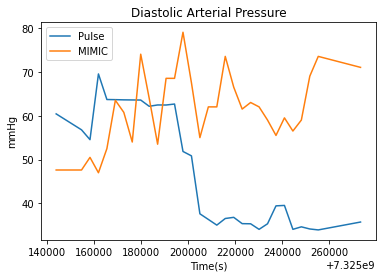

In [9]:
import matplotlib.pyplot as plt
plt.plot(time, pd.to_numeric(diaBP_pulse))
plt.plot(time, diaBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Diastolic Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

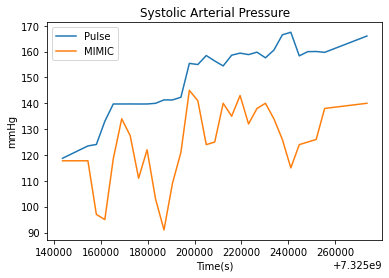

In [10]:
sysBP_pulse = simulation['SystolicArterialPressure (mmHg)']
sysBP_mimic = MIMICtable_filtered['SysBP']
plt.plot(time, pd.to_numeric(sysBP_pulse))
plt.plot(time, sysBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Systolic Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

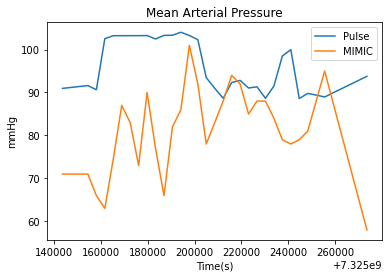

In [11]:
meanBP_pulse = simulation['MeanArterialPressure (mmHg)']
meanBP_mimic = MIMICtable_filtered['MeanBP']
plt.plot(time, pd.to_numeric(meanBP_pulse))
plt.plot(time, meanBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Mean Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

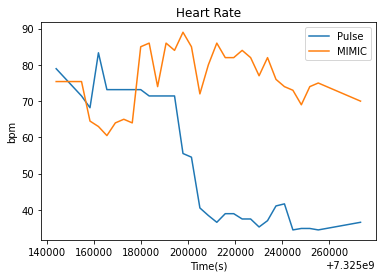

In [12]:
HR_pulse = simulation['HeartRate (1/min)']
HR_mimic = MIMICtable_filtered['HR']
plt.plot(time, pd.to_numeric(HR_pulse))
plt.plot(time, HR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('bpm')
plt.title('Heart Rate')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

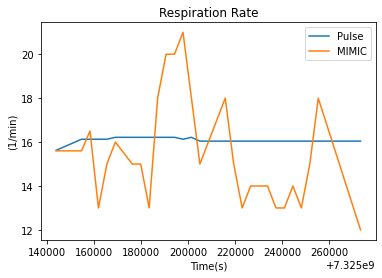

In [13]:
RR_pulse = simulation['RespirationRate (1/min)']
RR_mimic = MIMICtable_filtered['RR']
plt.plot(time, pd.to_numeric(RR_pulse))
plt.plot(time, RR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('(1/min)')
plt.title('Respiration Rate')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

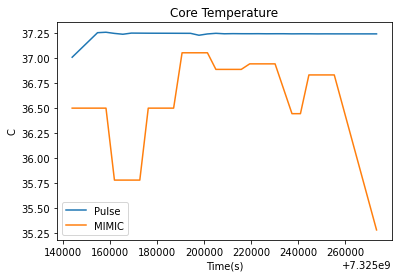

In [14]:
temp_pulse = simulation['CoreTemperature (degC)']
temp_mimic = MIMICtable_filtered['Temp_C']
plt.plot(time, pd.to_numeric(temp_pulse))
plt.plot(time, temp_mimic)
plt.xlabel('Time(s)')
plt.ylabel('C')
plt.title('Core Temperature')
plt.legend(['Pulse', 'MIMIC'])
plt.show()